In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalMaxPooling1D, Activation
from keras.layers import Conv1D, MaxPooling1D, Embedding
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


In [2]:
# parameters
MAX_SEQUENCE_LENGTH = 500
MAX_VOCAB_SIZE = 30000
EMBEDDING_DIM = 100
BATCH_SIZE = 128
EPOCHS = 5
num_words = 30000

## getting preprocessed data

In [3]:
with open("./data_pickle/embedding_matrix.pkl","rb") as f:
    embedding_matrix = pickle.load(f)

In [4]:
with open("./data_pickle/train_X.pkl","rb") as f:
    train_X = pickle.load(f)

In [5]:
with open("./data_pickle/train_y.pkl","rb") as f:
    train_y = pickle.load(f)

In [6]:
with open("./data_pickle/test_X.pkl","rb") as f:
    test_X = pickle.load(f)

In [7]:
with open("./data_pickle/test_y.pkl","rb") as f:
    test_y = pickle.load(f)

## model architecture

In [8]:
model = Sequential()

model.add(Embedding(
          num_words,
          EMBEDDING_DIM,
          weights=[embedding_matrix],
          input_length=MAX_SEQUENCE_LENGTH,
          trainable=False
        ))
model.add(Dropout(0.2))
model.add(Conv1D(250,
                3,
                padding='valid',
                activation='relu',
                strides=1))
model.add(GlobalMaxPooling1D())

model.add(Dense(250))
model.add(Dropout(0.2))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [9]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          3000000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 498, 250)          75250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0         
__________

## Training

In [10]:
r = model.fit(
  train_X,
  train_y,
  validation_data=(test_X, test_y),
  batch_size=BATCH_SIZE,
  epochs=EPOCHS
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 132s 5ms/step - loss: 0.5407 - acc: 0.7173 - val_loss: 0.3827 - val_acc: 0.8273
Epoch 2/5
25000/25000 [==============================] - 131s 5ms/step - loss: 0.3728 - acc: 0.8344 - val_loss: 0.3501 - val_acc: 0.8451
Epoch 3/5
25000/25000 [==============================] - 131s 5ms/step - loss: 0.3245 - acc: 0.8612 - val_loss: 0.3157 - val_acc: 0.8626
Epoch 4/5
25000/25000 [==============================] - 131s 5ms/step - loss: 0.2925 - acc: 0.8762 - val_loss: 0.3227 - val_acc: 0.8589
Epoch 5/5
25000/25000 [==============================] - 131s 5ms/step - loss: 0.2945 - acc: 0.8757 - val_loss: 0.3115 - val_acc: 0.8648


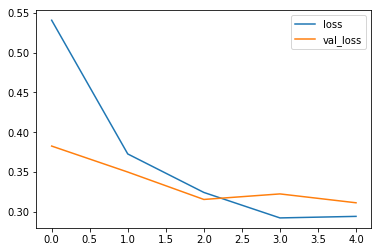

In [11]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

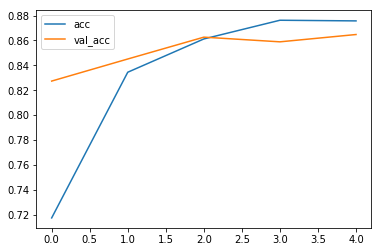

In [12]:
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

In [13]:
pred = model.predict(test_X, batch_size=BATCH_SIZE)
auc = roc_auc_score(test_y, pred)
print(auc)

0.9409653696


## Save the model

In [14]:
from keras.models import load_model

model.save('./data/model_cnn.h5')
del model